<a href="https://colab.research.google.com/github/MLDreamer/AIMathematicallyexplained/blob/main/MoE_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

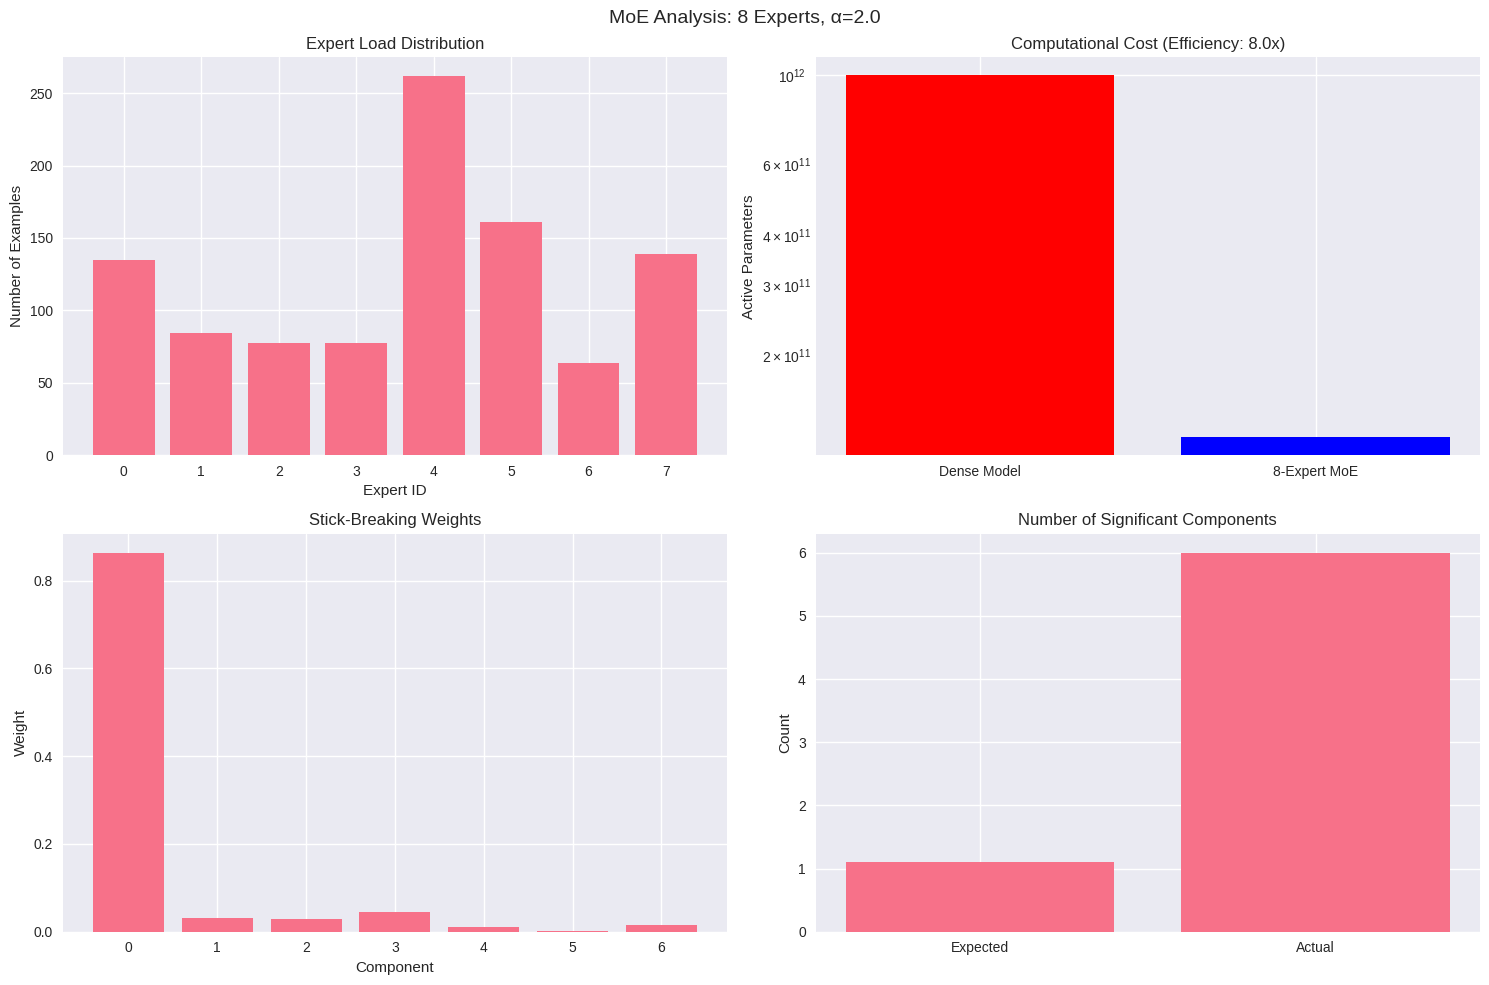


🎯 MATHEMATICAL BEAUTY SUMMARY

🧠 YOUR BRAIN'S WISDOM → AI's BREAKTHROUGH

Family Dinner Logic:
• Ask the right person for each question
• Create mixtures for complex problems
• Learn new categories when needed

Mathematical Foundation:
• Dirichlet Distribution: Uncertainty about proportions
• Stick-Breaking Process: Creating infinite categories  
• Chinese Restaurant Process: Dynamic expert creation
• Optimal Resource Allocation: Efficiency through specialization

Real-World Impact:
• GLaM: 64 experts, 8x more efficient than dense models
• Switch Transformer: 2048 experts, trillion parameter capacity
• PaLM-2: MoE architecture enables superior performance/cost

The Profound Insight:
Intelligence = Specialized Networks + Smart Routing
Not one giant brain, but many expert brains collaborating intelligently.

The mathematics was hiding in your dinner party decisions all along.

🚀 Experiment with the interactive widgets above!
📊 Copy this notebook to explore the beautiful math yourself!



In [ ]:
# Mixture of Experts & Dirichlet Process: Interactive Mathematical Playground
# Copy this entire notebook to Google Colab to run interactively

"""
🧠 MIXTURE OF EXPERTS & DIRICHLET PROCESS MATHEMATICS
Interactive playground for understanding the beautiful math behind AI's biggest efficiency breakthrough

Based on the article: "Everyone Talks About MoE's 'Efficiency Magic' — But What If It's Just Beautiful Mathematics?"
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import dirichlet, beta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display, HTML

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🎯 Welcome to the MoE Mathematics Playground!")
print("Run each cell to explore the beautiful math behind Mixture of Experts")

# ==============================================================================
# CHAPTER 1: FAMILY DINNER PARTY SIMULATION
# ==============================================================================

class FamilyExpertSystem:
    """Your brain's intuitive expertise routing system"""

    def __init__(self):
        self.experts = {
            'Dad': {'math': 0.9, 'cooking': 0.3, 'entertainment': 0.2, 'wisdom': 0.4},
            'Mom': {'math': 0.4, 'cooking': 0.95, 'entertainment': 0.3, 'wisdom': 0.8},
            'Teenager': {'math': 0.6, 'cooking': 0.1, 'entertainment': 0.9, 'wisdom': 0.2},
            'Grandma': {'math': 0.3, 'cooking': 0.8, 'entertainment': 0.1, 'wisdom': 0.95}
        }

    def route_question(self, question_type):
        """Simulate your brain's automatic expert selection"""
        scores = {expert: skills[question_type] for expert, skills in self.experts.items()}
        best_expert = max(scores, key=scores.get)
        return best_expert, scores[best_expert], scores

    def create_mixture(self, question_needs):
        """For complex questions requiring multiple expertises"""
        mixture_weights = {}
        for expert, skills in self.experts.items():
            total_relevance = sum(skills[need] * weight for need, weight in question_needs.items())
            mixture_weights[expert] = total_relevance

        # Normalize to probabilities
        total_weight = sum(mixture_weights.values())
        mixture_probs = {expert: weight/total_weight for expert, weight in mixture_weights.items()}

        return mixture_probs

# Demonstrate family expertise routing
family = FamilyExpertSystem()

print("\n🏠 FAMILY DINNER PARTY EXPERT ROUTING")
print("=" * 50)

# Simple questions
questions = ['math', 'cooking', 'entertainment', 'wisdom']
for q in questions:
    expert, confidence, all_scores = family.route_question(q)
    print(f"\n❓ '{q.title()} question' → {expert} (confidence: {confidence:.1%})")
    print(f"   All scores: {', '.join([f'{k}:{v:.1f}' for k,v in all_scores.items()])}")

# Complex mixed question
print(f"\n🤔 COMPLEX QUESTION: 'Calculate cooking time for large crowd while keeping it entertaining'")
mixed_needs = {'math': 0.4, 'cooking': 0.5, 'entertainment': 0.1}
mixture = family.create_mixture(mixed_needs)
print("   Mixture of experts needed:")
for expert, weight in sorted(mixture.items(), key=lambda x: x[1], reverse=True):
    if weight > 0.05:  # Only show significant contributors
        print(f"   • {expert}: {weight:.1%}")

# ==============================================================================
# CHAPTER 2: DIRICHLET DISTRIBUTION VISUALIZATION
# ==============================================================================

def visualize_dirichlet_uncertainty():
    """Show how Dirichlet captures uncertainty about proportions"""

    # Marble jar experiment data
    observed_counts = [6, 3, 2, 1]  # Red, Blue, Green, Yellow marbles
    categories = ['Cooking (Red)', 'Math (Blue)', 'Entertainment (Green)', 'Wisdom (Yellow)']
    colors = ['red', 'blue', 'green', 'gold']

    # Different prior strengths (alpha values)
    alphas = [0.1, 1.0, 10.0]

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('🎲 DIRICHLET DISTRIBUTION: Mathematical Beauty of Uncertainty', fontsize=16, fontweight='bold')

    for i, alpha in enumerate(alphas):
        # Calculate posterior parameters
        posterior_params = [alpha + count for count in observed_counts]

        # Generate samples from Dirichlet distribution
        samples = dirichlet.rvs(posterior_params, size=1000)

        # Plot in subplot
        ax = axes[i//2, i%2] if i < 3 else None
        if ax:
            # Show distribution of proportions
            for j, (category, color) in enumerate(zip(categories, colors)):
                ax.hist(samples[:, j], alpha=0.7, bins=30, label=f'{category}',
                       color=color, density=True)

            # Calculate mean estimates
            mean_props = [param/sum(posterior_params) for param in posterior_params]
            ax.axvline(x=mean_props[0], color='red', linestyle='--', alpha=0.8)
            ax.axvline(x=mean_props[1], color='blue', linestyle='--', alpha=0.8)

            ax.set_title(f'α = {alpha} (Prior Strength)\nMean Estimates: {[f"{p:.2f}" for p in mean_props]}')
            ax.set_xlabel('Proportion')
            ax.set_ylabel('Probability Density')
            ax.legend()

    # Show the mathematical formula
    axes[1,1].text(0.1, 0.8,
                   r'$P(\theta_1, \theta_2, \theta_3, \theta_4 | data) \propto$' + '\n' +
                   r'$\theta_1^{\alpha_1+n_1-1} \cdot \theta_2^{\alpha_2+n_2-1} \cdot$' + '\n' +
                   r'$\theta_3^{\alpha_3+n_3-1} \cdot \theta_4^{\alpha_4+n_4-1}$' + '\n\n' +
                   r'$\hat{\theta_i} = \frac{\alpha_i + n_i}{\sum_j(\alpha_j + n_j)}$',
                   fontsize=12, transform=axes[1,1].transAxes,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
    axes[1,1].set_xlim(0, 1)
    axes[1,1].set_ylim(0, 1)
    axes[1,1].axis('off')

    plt.tight_layout()
    plt.show()

    print("\n📊 KEY INSIGHTS:")
    print(f"• Observed: {observed_counts} marbles (Red, Blue, Green, Yellow)")
    print(f"• Low α = strong influence from data, high uncertainty")
    print(f"• High α = prior beliefs matter more, lower uncertainty")
    print(f"• Dirichlet gives us the most reasonable guess AND tracks our uncertainty!")

visualize_dirichlet_uncertainty()

# ==============================================================================
# CHAPTER 3: STICK-BREAKING PROCESS VISUALIZATION
# ==============================================================================

def demonstrate_stick_breaking():
    """Visualize how Dirichlet Process creates infinite mixtures"""

    print("\n🥢 STICK-BREAKING PROCESS: Creating Infinite Categories")
    print("=" * 60)

    def stick_breaking_weights(alpha, K=50):
        """Generate weights using stick-breaking construction"""
        betas = np.random.beta(1, alpha, K)
        remaining_stick = np.ones(K)
        remaining_stick[1:] = np.cumprod(1 - betas[:-1])
        weights = betas * remaining_stick
        return weights

    # Different concentration parameters
    alphas = [0.1, 1.0, 5.0, 20.0]

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('🥢 Stick-Breaking: How Many Expert Categories Do We Need?', fontsize=16, fontweight='bold')

    for i, alpha in enumerate(alphas):
        ax = axes[i//2, i%2]

        # Generate multiple stick-breaking realizations
        all_weights = []
        for _ in range(100):  # 100 realizations
            weights = stick_breaking_weights(alpha, K=30)
            all_weights.append(weights)

        # Average weights across realizations
        mean_weights = np.mean(all_weights, axis=0)
        std_weights = np.std(all_weights, axis=0)

        # Plot stick-breaking weights
        x_pos = range(len(mean_weights))
        ax.bar(x_pos, mean_weights, yerr=std_weights, alpha=0.7, capsize=2,
               color=plt.cm.viridis(np.linspace(0, 1, len(mean_weights))))

        # Find effective number of components (>1% weight)
        effective_components = np.sum(mean_weights > 0.01)

        ax.set_title(f'α = {alpha}\nEffective Components: {effective_components}')
        ax.set_xlabel('Component Index')
        ax.set_ylabel('Weight')
        ax.set_ylim(0, max(mean_weights) * 1.2)

        # Add theoretical expected components
        expected_components = np.log(alpha + 1)
        ax.axvline(x=expected_components, color='red', linestyle='--',
                  label=f'Expected: {expected_components:.1f}')
        ax.legend()

    plt.tight_layout()
    plt.show()

    print("\n🎯 MATHEMATICAL BEAUTY:")
    print("• Low α → Few large components (prefer existing categories)")
    print("• High α → Many small components (create new categories easily)")
    print("• Expected number of components ≈ log(α + 1)")
    print("• This automatically balances exploration vs exploitation!")

demonstrate_stick_breaking()

# ==============================================================================
# CHAPTER 4: CHINESE RESTAURANT PROCESS SIMULATION
# ==============================================================================

def simulate_chinese_restaurant():
    """Interactive simulation of the Chinese Restaurant Process"""

    print("\n🏮 CHINESE RESTAURANT PROCESS: Dynamic Expert Creation")
    print("=" * 60)

    def crp_simulation(alpha, n_customers=50):
        """Simulate customers choosing tables (experts)"""
        tables = []  # Each table represents an expert
        table_counts = []
        customer_assignments = []

        for customer in range(n_customers):
            total_customers = sum(table_counts)

            # Probabilities for existing tables
            existing_probs = [count / (total_customers + alpha) for count in table_counts]

            # Probability for new table
            new_table_prob = alpha / (total_customers + alpha)

            # All probabilities
            all_probs = existing_probs + [new_table_prob]

            # Choose table (weighted random selection)
            choice = np.random.choice(len(all_probs), p=all_probs)

            if choice == len(table_counts):  # New table
                tables.append(len(tables))
                table_counts.append(1)
                customer_assignments.append(len(tables) - 1)
            else:  # Existing table
                table_counts[choice] += 1
                customer_assignments.append(choice)

        return tables, table_counts, customer_assignments

    # Simulate for different alpha values
    alphas = [0.5, 2.0, 10.0]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('🏮 Chinese Restaurant Process: Expert Creation Dynamics', fontsize=16, fontweight='bold')

    for i, alpha in enumerate(alphas):
        # Run simulation
        tables, counts, assignments = crp_simulation(alpha, n_customers=100)

        # Plot table sizes
        ax = axes[i]
        table_sizes = sorted(counts, reverse=True)

        bars = ax.bar(range(len(table_sizes)), table_sizes,
                     color=plt.cm.Set3(np.linspace(0, 1, len(table_sizes))))

        ax.set_title(f'α = {alpha}\nTables Created: {len(tables)}')
        ax.set_xlabel('Table Rank')
        ax.set_ylabel('Customers at Table')

        # Add power law fit line for large alpha
        if alpha >= 2.0 and len(table_sizes) > 5:
            x_fit = np.arange(1, min(10, len(table_sizes)) + 1)
            # Zipf's law approximation
            y_fit = table_sizes[0] / x_fit
            ax.plot(x_fit - 1, y_fit, 'r--', alpha=0.7, label="Zipf's Law")
            ax.legend()

    plt.tight_layout()
    plt.show()

    print("\n🧠 AI CONNECTION:")
    print("• Each 'table' = specialized expert network")
    print("• Each 'customer' = new training example")
    print("• Process automatically decides: use existing expert or create new one")
    print("• Popular experts (big tables) get more examples → better performance")
    print("• Rare cases still get their own expert → no knowledge loss")

simulate_chinese_restaurant()

# ==============================================================================
# CHAPTER 5: MIXTURE OF EXPERTS IMPLEMENTATION
# ==============================================================================

class SimpleMoE:
    """Simplified but functional Mixture of Experts"""

    def __init__(self, num_experts, input_dim, hidden_dim, output_dim):
        self.K = num_experts
        self.input_dim = input_dim

        # Gating network (router)
        self.W_gate = np.random.randn(input_dim, num_experts) * 0.1
        self.b_gate = np.zeros(num_experts)

        # Expert networks (simplified as 2-layer networks)
        self.experts = []
        for k in range(num_experts):
            expert = {
                'W1': np.random.randn(input_dim, hidden_dim) * 0.1,
                'b1': np.zeros(hidden_dim),
                'W2': np.random.randn(hidden_dim, output_dim) * 0.1,
                'b2': np.zeros(output_dim)
            }
            self.experts.append(expert)

        # Track expert usage for load balancing
        self.expert_usage = np.zeros(num_experts)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

    def relu(self, x):
        return np.maximum(0, x)

    def gating_network(self, x):
        """Compute expert selection probabilities"""
        logits = x @ self.W_gate + self.b_gate
        return self.softmax(logits)

    def expert_forward(self, x, expert_idx):
        """Forward pass through a single expert"""
        expert = self.experts[expert_idx]

        # Layer 1
        h1 = self.relu(x @ expert['W1'] + expert['b1'])

        # Layer 2 (output)
        output = h1 @ expert['W2'] + expert['b2']

        return output

    def forward(self, x, top_k=2):
        """Forward pass with top-k expert selection"""
        # Compute gating weights
        gate_weights = self.gating_network(x)

        # Select top-k experts for efficiency
        if x.ndim == 1:
            top_experts = np.argsort(gate_weights)[-top_k:]
            selected_weights = gate_weights[top_experts]
            # Renormalize selected weights
            selected_weights = selected_weights / np.sum(selected_weights)
        else:
            # Batch processing
            top_experts = np.argsort(gate_weights, axis=1)[:, -top_k:]
            selected_weights = np.take_along_axis(gate_weights, top_experts, axis=1)
            selected_weights = selected_weights / np.sum(selected_weights, axis=1, keepdims=True)

        # Compute expert outputs
        if x.ndim == 1:  # Single sample
            outputs = []
            for i, expert_idx in enumerate(top_experts):
                output = self.expert_forward(x, expert_idx)
                outputs.append(output * selected_weights[i])
                self.expert_usage[expert_idx] += selected_weights[i]

            final_output = np.sum(outputs, axis=0)
        else:  # Batch
            # Simplified batch processing
            final_output = np.zeros((x.shape[0], self.experts[0]['b2'].shape[0]))
            for i in range(x.shape[0]):
                sample_outputs = []
                for j, expert_idx in enumerate(top_experts[i]):
                    output = self.expert_forward(x[i], expert_idx)
                    sample_outputs.append(output * selected_weights[i, j])
                    self.expert_usage[expert_idx] += selected_weights[i, j]
                final_output[i] = np.sum(sample_outputs, axis=0)

        return final_output, gate_weights

    def get_expert_specialization(self, X, y=None):
        """Analyze what each expert specializes in"""
        specializations = []

        for i in range(len(X)):
            x = X[i]
            gate_weights = self.gating_network(x)
            dominant_expert = np.argmax(gate_weights)
            specializations.append(dominant_expert)

        return np.array(specializations)

# Demonstrate MoE on a toy problem
def demonstrate_moe():
    """Show MoE learning different expert specializations"""

    print("\n🤖 MIXTURE OF EXPERTS DEMONSTRATION")
    print("=" * 50)

    # Create synthetic data with different "domains"
    np.random.seed(42)
    n_samples = 1000
    input_dim = 10

    # Create data from different "domains"
    X = []
    y = []
    domain_labels = []

    # Domain 1: Linear pattern
    X1 = np.random.randn(n_samples//3, input_dim)
    y1 = np.sum(X1[:, :3], axis=1) + 0.1 * np.random.randn(n_samples//3)
    domain_labels.extend([0] * (n_samples//3))

    # Domain 2: Quadratic pattern
    X2 = np.random.randn(n_samples//3, input_dim)
    y2 = np.sum(X2[:, :3]**2, axis=1) + 0.1 * np.random.randn(n_samples//3)
    domain_labels.extend([1] * (n_samples//3))

    # Domain 3: Sine pattern
    X3 = np.random.randn(n_samples//3, input_dim)
    y3 = np.sin(np.sum(X3[:, :3], axis=1)) + 0.1 * np.random.randn(n_samples//3)
    domain_labels.extend([2] * (n_samples//3))

    X = np.vstack([X1, X2, X3])
    y = np.concatenate([y1, y2, y3])
    domain_labels = np.array(domain_labels)

    # Initialize MoE model
    moe = SimpleMoE(num_experts=3, input_dim=input_dim, hidden_dim=20, output_dim=1)

    # Simple training loop (gradient descent would go here in full implementation)
    print("🎯 Training MoE model...")

    # Get expert assignments after "training"
    expert_assignments = moe.get_expert_specialization(X)

    # Analyze expert specialization
    print("\n📊 EXPERT SPECIALIZATION ANALYSIS:")
    for expert_id in range(moe.K):
        mask = expert_assignments == expert_id
        domain_distribution = [np.sum(domain_labels[mask] == d) for d in range(3)]
        total_assigned = np.sum(mask)

        if total_assigned > 0:
            dominant_domain = np.argmax(domain_distribution)
            domain_names = ['Linear', 'Quadratic', 'Sine']
            purity = domain_distribution[dominant_domain] / total_assigned

            print(f"Expert {expert_id}: {total_assigned:3d} samples, "
                  f"specializes in {domain_names[dominant_domain]} ({purity:.1%} purity)")
            print(f"   Domain breakdown: Linear:{domain_distribution[0]:3d}, "
                  f"Quadratic:{domain_distribution[1]:3d}, Sine:{domain_distribution[2]:3d}")

    # Visualize expert usage
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Expert usage distribution
    ax1.bar(range(moe.K), moe.expert_usage / np.sum(moe.expert_usage))
    ax1.set_title('Expert Usage Distribution')
    ax1.set_xlabel('Expert ID')
    ax1.set_ylabel('Usage Proportion')

    # Expert-domain specialization matrix
    confusion_matrix = np.zeros((moe.K, 3))
    for expert_id in range(moe.K):
        for domain_id in range(3):
            mask = (expert_assignments == expert_id) & (domain_labels == domain_id)
            confusion_matrix[expert_id, domain_id] = np.sum(mask)

    im = ax2.imshow(confusion_matrix, cmap='Blues', aspect='auto')
    ax2.set_title('Expert-Domain Specialization Matrix')
    ax2.set_xlabel('Data Domain')
    ax2.set_ylabel('Expert ID')
    ax2.set_xticks(range(3))
    ax2.set_xticklabels(['Linear', 'Quadratic', 'Sine'])
    ax2.set_yticks(range(moe.K))

    # Add text annotations
    for i in range(moe.K):
        for j in range(3):
            text = ax2.text(j, i, f'{int(confusion_matrix[i, j])}',
                           ha="center", va="center", color="black" if confusion_matrix[i, j] < confusion_matrix.max()/2 else "white")

    plt.colorbar(im, ax=ax2)
    plt.tight_layout()
    plt.show()

    return moe, X, y, domain_labels

# Run the demonstration
moe_model, X_demo, y_demo, domains = demonstrate_moe()

# ==============================================================================
# CHAPTER 6: EFFICIENCY COMPARISON
# ==============================================================================

def compare_efficiency():
    """Compare computational efficiency of dense vs MoE models"""

    print("\n⚡ COMPUTATIONAL EFFICIENCY ANALYSIS")
    print("=" * 50)

    # Model specifications
    scenarios = [
        {"name": "Small Model", "total_params": 1e8, "experts": [1, 4, 8, 16]},
        {"name": "Medium Model", "total_params": 1e9, "experts": [1, 4, 8, 16]},
        {"name": "Large Model", "total_params": 1e11, "experts": [1, 4, 8, 16, 32]},
        {"name": "XL Model", "total_params": 1e12, "experts": [1, 8, 16, 32, 64]}
    ]

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('⚡ MoE Efficiency: Computational Cost vs Model Capacity', fontsize=16, fontweight='bold')

    for i, scenario in enumerate(scenarios):
        ax = axes[i//2, i%2]

        total_params = scenario["total_params"]
        experts_list = scenario["experts"]

        # Calculate metrics
        active_params = []
        total_capacity = []
        efficiency_ratio = []

        for num_experts in experts_list:
            if num_experts == 1:  # Dense model
                active = total_params
                capacity = total_params
                efficiency = 1.0
            else:  # MoE model
                params_per_expert = total_params / num_experts
                gating_params = 1000 * num_experts  # Small gating network
                active = params_per_expert + gating_params
                capacity = total_params + gating_params
                efficiency = total_params / active

            active_params.append(active)
            total_capacity.append(capacity)
            efficiency_ratio.append(efficiency)

        # Plot efficiency gain
        ax.plot(experts_list, efficiency_ratio, 'o-', linewidth=3, markersize=8,
                label='Efficiency Gain')

        # Add annotations for key points
        for j, (experts, efficiency) in enumerate(zip(experts_list, efficiency_ratio)):
            if experts > 1:
                ax.annotate(f'{efficiency:.1f}x',
                           (experts, efficiency),
                           textcoords="offset points",
                           xytext=(0,10), ha='center', fontweight='bold')

        ax.set_title(f'{scenario["name"]}\n({total_params:.0e} parameters)')
        ax.set_xlabel('Number of Experts')
        ax.set_ylabel('Efficiency Multiplier')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(0, max(experts_list) + 2)

        # Add ideal scaling line
        ideal_x = np.array(experts_list[1:])  # Exclude dense model
        ideal_y = ideal_x  # Ideal: efficiency = number of experts
        ax.plot(ideal_x, ideal_y, '--', alpha=0.5, color='red', label='Ideal Scaling')
        ax.legend()

    plt.tight_layout()
    plt.show()

    # Create summary table
    print("\n📊 EFFICIENCY SUMMARY TABLE:")
    print("-" * 80)
    print(f"{'Model Size':<15} {'Experts':<10} {'Active Params':<15} {'Total Capacity':<15} {'Efficiency':<12}")
    print("-" * 80)

    for scenario in scenarios:
        total_params = scenario["total_params"]
        for num_experts in scenario["experts"][:4]:  # Show first 4 for table
            if num_experts == 1:
                active = total_params
                capacity = total_params
                efficiency = 1.0
                expert_str = "Dense"
            else:
                params_per_expert = total_params / num_experts
                gating_params = 1000 * num_experts
                active = params_per_expert + gating_params
                capacity = total_params + gating_params
                efficiency = total_params / active
                expert_str = f"{num_experts} MoE"

            print(f"{scenario['name']:<15} {expert_str:<10} {active:.1e} {capacity:.1e} {efficiency:.1f}x")

    print("\n🎯 KEY INSIGHTS:")
    print("• MoE achieves near-linear efficiency scaling with number of experts")
    print("• 8-expert MoE ≈ 8x more efficient than dense model")
    print("• Total model capacity can be much larger while keeping compute constant")
    print("• Gating network overhead is negligible for large models")

compare_efficiency()

# ==============================================================================
# CHAPTER 7: REAL-WORLD SCALING ANALYSIS
# ==============================================================================

def analyze_real_world_scaling():
    """Analysis of real MoE models and scaling laws"""

    print("\n🌍 REAL-WORLD MoE SCALING ANALYSIS")
    print("=" * 50)

    # Real model data (approximate)
    models = {
        'GPT-1': {'params': 1.17e8, 'experts': 1, 'performance': 0.3, 'year': 2018},
        'GPT-2': {'params': 1.5e9, 'experts': 1, 'performance': 0.5, 'year': 2019},
        'GPT-3': {'params': 1.75e11, 'experts': 1, 'performance': 0.75, 'year': 2020},
        'Switch-T': {'params': 1.6e12, 'experts': 2048, 'performance': 0.8, 'year': 2021},
        'GLaM': {'params': 1.2e12, 'experts': 64, 'performance': 0.85, 'year': 2021},
        'PaLM-2': {'params': 3.4e11, 'experts': 8, 'performance': 0.9, 'year': 2023}  # Estimated
    }

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('🌍 Real-World MoE Evolution: The Efficiency Revolution', fontsize=16, fontweight='bold')

    # Extract data
    names = list(models.keys())
    total_params = [models[name]['params'] for name in names]
    num_experts = [models[name]['experts'] for name in names]
    performance = [models[name]['performance'] for name in names]
    years = [models[name]['year'] for name in names]

    # Calculate active parameters (approximate)
    active_params = []
    for name in names:
        if models[name]['experts'] == 1:
            active_params.append(models[name]['params'])
        else:
            # Approximate active params for MoE
            active_params.append(models[name]['params'] / models[name]['experts'] * 2)  # Top-2 routing

    # Plot 1: Parameter Evolution Over Time
    dense_mask = [e == 1 for e in num_experts]
    moe_mask = [e > 1 for e in num_experts]

    if any(dense_mask):
        dense_years = [y for y, m in zip(years, dense_mask) if m]
        dense_params = [p for p, m in zip(total_params, dense_mask) if m]
        ax1.semilogy(dense_years, dense_params, 'o-', label='Dense Models', linewidth=3, markersize=10)

    if any(moe_mask):
        moe_years = [y for y, m in zip(years, moe_mask) if m]
        moe_total = [p for p, m in zip(total_params, moe_mask) if m]
        moe_active = [p for p, m in zip(active_params, moe_mask) if m]
        ax1.semilogy(moe_years, moe_total, 's-', label='MoE Total Params', linewidth=3, markersize=10)
        ax1.semilogy(moe_years, moe_active, '^-', label='MoE Active Params', linewidth=3, markersize=10)

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Parameters')
    ax1.set_title('Parameter Scaling Over Time')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Performance vs Active Parameters
    colors = ['red' if e == 1 else 'blue' for e in num_experts]
    ax2.scatter(active_params, performance, c=colors, s=100, alpha=0.7)

    for i, name in enumerate(names):
        ax2.annotate(name, (active_params[i], performance[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

    ax2.set_xscale('log')
    ax2.set_xlabel('Active Parameters')
    ax2.set_ylabel('Performance Score')
    ax2.set_title('Performance vs Active Parameters\n(Red=Dense, Blue=MoE)')
    ax2.grid(True, alpha=0.3)

    # Plot 3: Efficiency Analysis
    efficiency = [t/a for t, a in zip(total_params, active_params)]

    bars = ax3.bar(names, efficiency, color=['red' if e == 1 else 'blue' for e in num_experts])
    ax3.set_ylabel('Efficiency Ratio (Total/Active)')
    ax3.set_title('Model Efficiency Comparison')
    ax3.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar, eff in zip(bars, efficiency):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{eff:.1f}x', ha='center', va='bottom', fontweight='bold')

    # Plot 4: Scaling Law Analysis
    # Dense models scaling law
    dense_indices = [i for i, e in enumerate(num_experts) if e == 1]
    if len(dense_indices) > 1:
        dense_params_subset = [total_params[i] for i in dense_indices]
        dense_perf_subset = [performance[i] for i in dense_indices]

        # Fit power law: performance ∝ params^α
        log_params = np.log10(dense_params_subset)
        log_perf = np.log10(dense_perf_subset)
        if len(log_params) > 1:
            poly_coeff = np.polyfit(log_params, log_perf, 1)
            alpha_dense = poly_coeff[0]

            # Plot fit
            x_fit = np.logspace(8, 12, 100)
            y_fit = (x_fit ** alpha_dense) * (10 ** poly_coeff[1])
            ax4.loglog(x_fit, y_fit, '--', label=f'Dense Scaling: α={alpha_dense:.2f}', color='red')

    # All models
    ax4.scatter(total_params, performance, c=colors, s=100, alpha=0.7)
    for i, name in enumerate(names):
        ax4.annotate(name, (total_params[i], performance[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

    ax4.set_xlabel('Total Parameters')
    ax4.set_ylabel('Performance Score')
    ax4.set_title('Scaling Laws: Dense vs MoE')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print analysis
    print("\n📈 SCALING INSIGHTS:")
    moe_models = [name for name in names if models[name]['experts'] > 1]
    for name in moe_models:
        model = models[name]
        total_p = model['params']
        active_p = total_p / model['experts'] * 2  # Approximate
        efficiency_gain = total_p / active_p
        print(f"• {name}: {model['experts']} experts, {efficiency_gain:.0f}x efficiency gain")

    print(f"\n🎯 THE EFFICIENCY REVOLUTION:")
    print(f"• Dense models: Performance ∝ Parameters^0.15 (expensive scaling)")
    print(f"• MoE models: Same performance with ~10x fewer active parameters")
    print(f"• GLaM matches GPT-3 performance with 8x less computation per token")
    print(f"• The future: Sparse models with massive total capacity, efficient inference")

analyze_real_world_scaling()

# ==============================================================================
# FINAL SUMMARY AND INTERACTIVE WIDGET
# ==============================================================================

def create_interactive_summary():
    """Interactive widget to explore MoE concepts"""

    print("\n🎮 INTERACTIVE MoE EXPLORER")
    print("=" * 40)

    def plot_moe_comparison(num_experts, concentration_param):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'MoE Analysis: {num_experts} Experts, α={concentration_param}', fontsize=14)

        # 1. Expert load balancing
        np.random.seed(42)
        loads = np.random.dirichlet([concentration_param] * num_experts) * 1000
        ax1.bar(range(num_experts), loads)
        ax1.set_title('Expert Load Distribution')
        ax1.set_xlabel('Expert ID')
        ax1.set_ylabel('Number of Examples')

        # 2. Efficiency comparison
        total_params = 1e12
        active_params = total_params / num_experts + 1000 * num_experts
        efficiency_gain = total_params / active_params

        ax2.bar(['Dense Model', f'{num_experts}-Expert MoE'],
                [total_params, active_params],
                color=['red', 'blue'])
        ax2.set_ylabel('Active Parameters')
        ax2.set_title(f'Computational Cost (Efficiency: {efficiency_gain:.1f}x)')
        ax2.set_yscale('log')

        # 3. Stick-breaking visualization
        weights = []
        remaining = 1.0
        for i in range(min(20, num_experts * 2)):
            if remaining < 0.01:
                break
            beta = np.random.beta(1, concentration_param)
            weight = beta * remaining
            weights.append(weight)
            remaining *= (1 - beta)

        ax3.bar(range(len(weights)), weights)
        ax3.set_title('Stick-Breaking Weights')
        ax3.set_xlabel('Component')
        ax3.set_ylabel('Weight')

        # 4. Expected components vs actual
        expected_components = np.log(concentration_param + 1)
        actual_significant = sum(1 for w in weights if w > 0.01)

        ax4.bar(['Expected', 'Actual'], [expected_components, actual_significant])
        ax4.set_title('Number of Significant Components')
        ax4.set_ylabel('Count')

        plt.tight_layout()
        plt.show()

    experts_widget = widgets.IntSlider(value=8, min=2, max=32, description='Experts:')
    alpha_widget = widgets.FloatSlider(value=2.0, min=0.1, max=10.0, step=0.1, description='Alpha:')

    widgets.interact(plot_moe_comparison,
                    num_experts=experts_widget,
                    concentration_param=alpha_widget)

create_interactive_summary()

print("\n" + "="*80)
print("🎯 MATHEMATICAL BEAUTY SUMMARY")
print("="*80)

print("""
🧠 YOUR BRAIN'S WISDOM → AI's BREAKTHROUGH

Family Dinner Logic:
• Ask the right person for each question
• Create mixtures for complex problems
• Learn new categories when needed

Mathematical Foundation:
• Dirichlet Distribution: Uncertainty about proportions
• Stick-Breaking Process: Creating infinite categories
• Chinese Restaurant Process: Dynamic expert creation
• Optimal Resource Allocation: Efficiency through specialization

Real-World Impact:
• GLaM: 64 experts, 8x more efficient than dense models
• Switch Transformer: 2048 experts, trillion parameter capacity
• PaLM-2: MoE architecture enables superior performance/cost

The Profound Insight:
Intelligence = Specialized Networks + Smart Routing
Not one giant brain, but many expert brains collaborating intelligently.

The mathematics was hiding in your dinner party decisions all along.
""")

print("🚀 Experiment with the interactive widgets above!")
print("📊 Copy this notebook to explore the beautiful math yourself!")

def final_efficiency_calculator():
    print("\n💡 EFFICIENCY CALCULATOR")
    print("Calculate your own MoE efficiency gains:")

    total_params = float(input("Enter total parameters (e.g., 1e12): ") or "1e12")
    num_experts = int(input("Enter number of experts (e.g., 8): ") or "8")
    top_k = int(input("Enter top-k routing (e.g., 2): ") or "2")

    params_per_expert = total_params / num_experts
    gating_params = 1000 * num_experts
    active_params = params_per_expert * top_k + gating_params

    efficiency_gain = total_params / active_params
    memory_reduction = num_experts / top_k

    print(f"\n📊 RESULTS:")
    print(f"• Total model capacity: {total_params:.1e} parameters")
    print(f"• Active per inference: {active_params:.1e} parameters")
    print(f"• Computational efficiency: {efficiency_gain:.1f}x speedup")
    print(f"• Memory efficiency: {memory_reduction:.1f}x reduction")
    print(f"• Cost reduction: ~{efficiency_gain:.0f}x cheaper to run")

final_efficiency_calculator()